In [1]:
import numpy as np
X = 2 * np.random.rand(100,1)

In [3]:
X.shape

(100, 1)

In [5]:
y= 4 + 3 * X  +np.random.randn(100,1)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


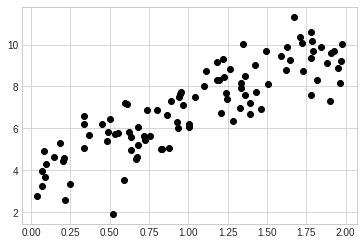

In [7]:
plt.plot(X, y, 'o', color='black')
plt.show()

In [8]:
X_b = np.c_[np.ones((100,1)),X]  # add x0 =1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
theta_best

array([[3.80639717],
       [3.10259762]])

In [12]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.80639717],
       [10.01159241]])

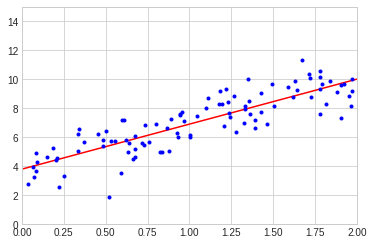

In [13]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lin_reg.intercept_, lin_reg.coef_

(array([3.80639717]), array([[3.10259762]]))

In [17]:
lin_reg.predict(X_new)

array([[ 3.80639717],
       [10.01159241]])

In [22]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

In [19]:
theta = np.random.randn(2,1) #random initialization

In [23]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [24]:
theta

array([[3.80639717],
       [3.10259762]])

In [25]:
#stochasitc gradiant descent
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters


In [29]:
def learning_schedule(t):
    return t0/ (t+ t1)

In [30]:
theta = np.random.randn(2,1) # random initialization

In [32]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [33]:
theta

array([[3.81116497],
       [3.11868809]])

In [36]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [37]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.82034693]), array([3.15418206]))

In [38]:
#Polynomial Regression
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X**2 + X + 2 + np.random.rand(m,1)

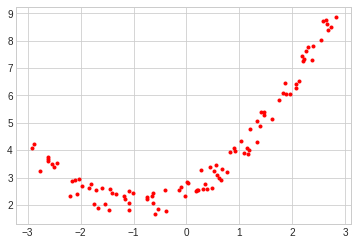

In [40]:
plt.plot(X, y, "r.")
plt.show()

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.4742391])

In [42]:
X_poly[0]

array([0.4742391 , 0.22490272])

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.53713252]), array([[0.94138997, 0.50591536]]))

In [45]:
y_predict = lin_reg.predict(X_poly)

In [53]:
y_predict.shape

(100, 1)

In [54]:
X_poly.shape

(100, 2)

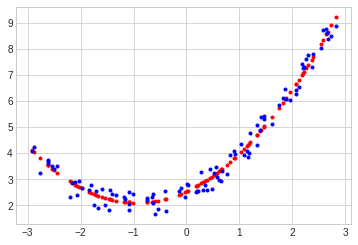

In [55]:
plt.plot(np.sort(X),y_predict, "r.")
plt.plot(X, y, "b.")
#plt.axis([0,2,0,15])
plt.show()


In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [71]:
def plot_learning_curves(model, x, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors),"r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors),"b-", linewidth=3, label="val")
    plt.legend(loc = "upper right")
    plt.ylabel('RMSE')
    plt.axis([0,80,0,3])

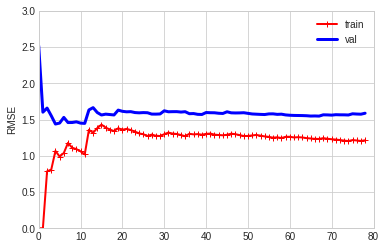

In [72]:
lin_reg= LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [67]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("lin_reg", LinearRegression()),
                    ])

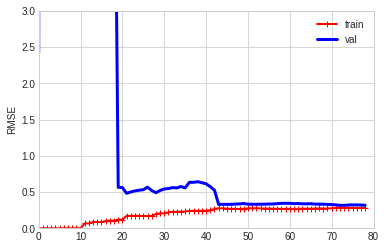

In [73]:
plot_learning_curves(polynomial_regression, X, y)

In [74]:
#Closed Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha =1,solver ="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.32076988]])

In [75]:
sgd_reg = SGDRegressor(penalty ="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.28700423])